In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
case = pd.read_csv('Output_Data/case_clean.csv',index_col=0,parse_dates=True, squeeze=True)
death = pd.read_csv('Output_Data/death_clean.csv',index_col=0,parse_dates=True, squeeze=True)
hosp = pd.read_csv('Output_Data/hosp_clean.csv',index_col=0,parse_dates=True, squeeze=True)
icu = pd.read_csv('Output_Data/icu_clean.csv',index_col=0,parse_dates=True, squeeze=True)

## Preliminary Analysis

### VIC

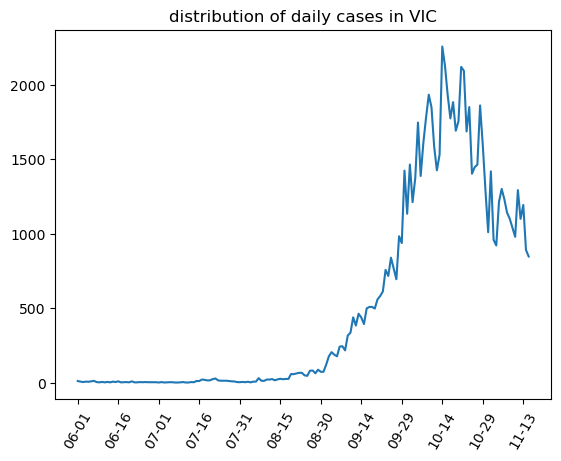

In [3]:
plt.plot(case['Date'], case['VIC'])
plt.title('distribution of daily cases in VIC', fontsize=12)
plt.xticks(np.arange(0, 170, step=15), rotation=60)
plt.savefig('Plots/distribution of daily cases in VIC.png',bbox_inches='tight')
plt.show()

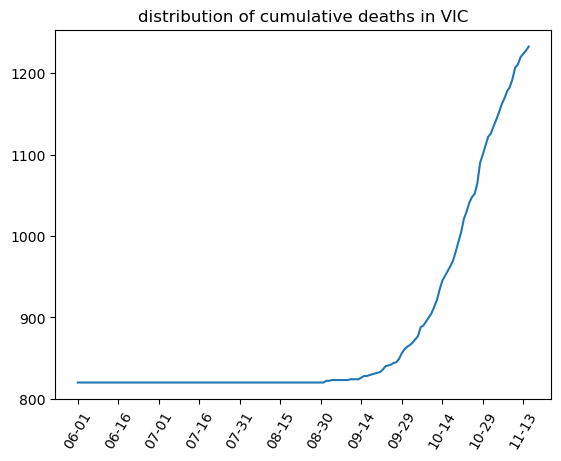

In [4]:
plt.plot(death['Date'], death['VIC'])
plt.title('distribution of cumulative deaths in VIC', fontsize=12)
plt.xticks(np.arange(0, 170, step=15), rotation=60)
plt.savefig('Plots/distribution of cumulative deaths in VIC.png',bbox_inches='tight')
plt.show()

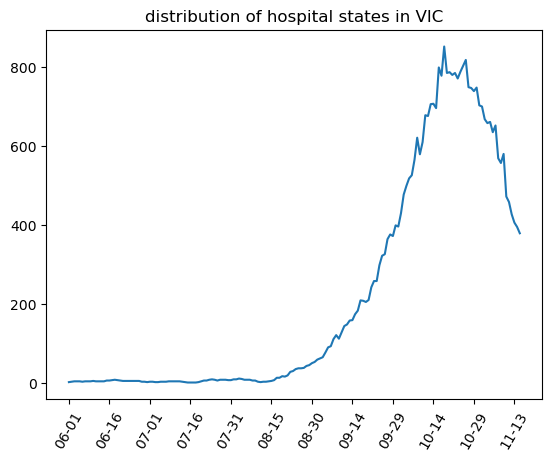

In [5]:
plt.plot(hosp['Date'], hosp['VIC'])
plt.title('distribution of hospital states in VIC', fontsize=12)
plt.xticks(np.arange(0, 170, step=15), rotation=60)
plt.savefig('Plots/distribution of hospital states in VIC.png',bbox_inches='tight')
plt.show()

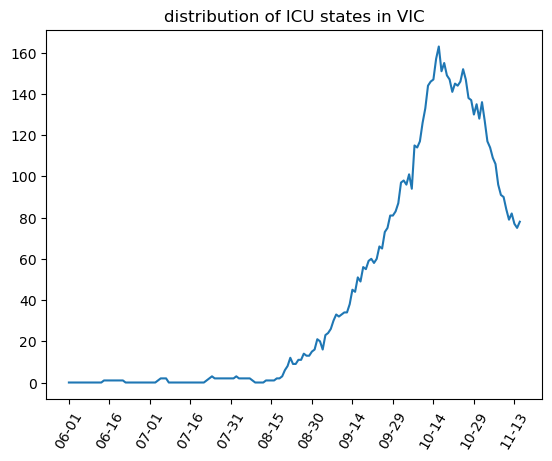

In [6]:
plt.plot(icu['Date'], icu['VIC'])
plt.title('distribution of ICU states in VIC', fontsize=12)
plt.xticks(np.arange(0, 170, step=15), rotation=60)
plt.savefig('Plots/distribution of ICU states in VIC.png',bbox_inches='tight')
plt.show()

### NSW

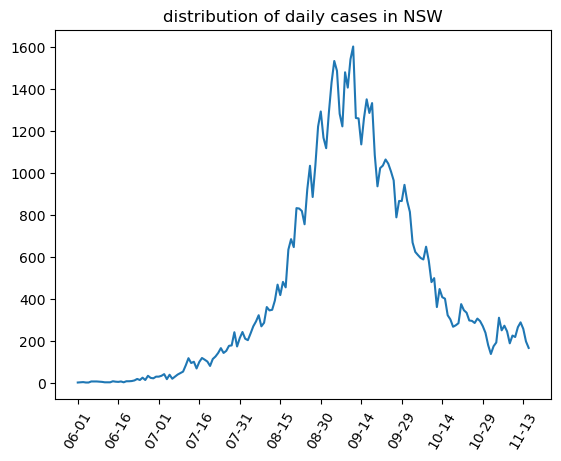

In [7]:
plt.plot(case['Date'], case['NSW'])
plt.title('distribution of daily cases in NSW', fontsize=12)
plt.xticks(np.arange(0, 170, step=15), rotation=60)
plt.savefig('Plots/distribution of daily cases in NSW.png',bbox_inches='tight')
plt.show()

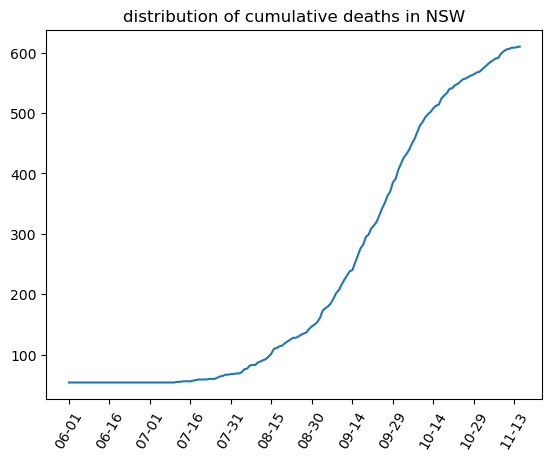

In [8]:
plt.plot(death['Date'], death['NSW'])
plt.title('distribution of cumulative deaths in NSW', fontsize=12)
plt.xticks(np.arange(0, 170, step=15), rotation=60)
plt.savefig('Plots/distribution of cumulative deaths in NSW.png',bbox_inches='tight')
plt.show()

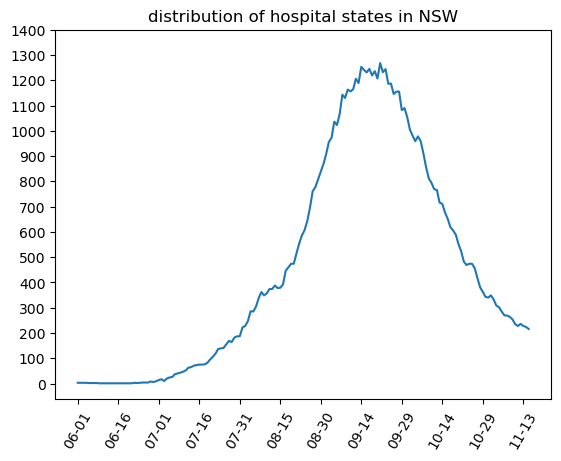

In [9]:
plt.plot(hosp['Date'], hosp['NSW'])
plt.title('distribution of hospital states in NSW', fontsize=12)
plt.xticks(np.arange(0, 170, step=15), rotation=60)
plt.yticks(np.arange(0, 1500, step=100), rotation=0)
plt.savefig('Plots/distribution of hospital states in NSW.png',bbox_inches='tight')
plt.show()

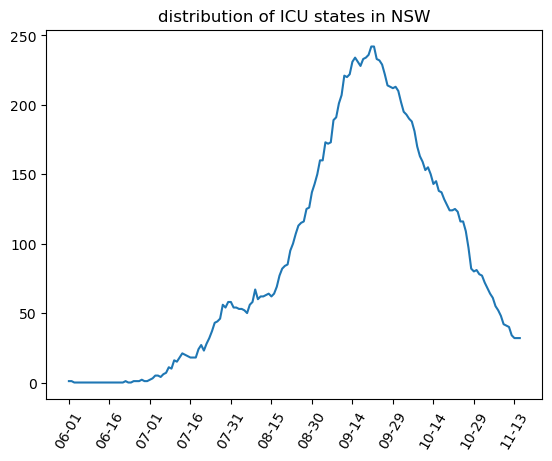

In [10]:
plt.plot(icu['Date'], icu['NSW'])
plt.title('distribution of ICU states in NSW', fontsize=12)
plt.xticks(np.arange(0, 170, step=15), rotation=60)
plt.savefig('Plots/distribution of ICU states in NSW.png',bbox_inches='tight')
plt.show()

## Generate Plots of Daily Deaths

In [11]:
VIC_death = []
NSW_death = []
for cum_death in death.values:
    VIC_death.append(cum_death[2])
    NSW_death.append(cum_death[1])

VIC_daily_death = []
NSW_daily_death = []
for i in range(len(VIC_death) - 1):
    VIC_daily_death.append(VIC_death[i+1] - VIC_death[i])
    NSW_daily_death.append(NSW_death[i+1] - NSW_death[i])

VIC_daily_death.append(2)
NSW_daily_death.append(8)

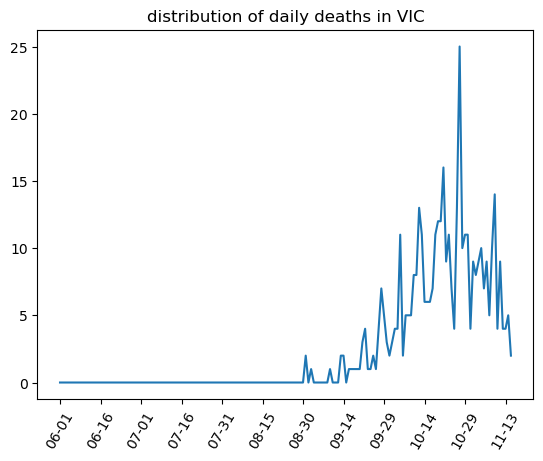

In [12]:
plt.plot(death['Date'], VIC_daily_death)
plt.title('distribution of daily deaths in VIC', fontsize=12)
plt.xticks(np.arange(0, 170, step=15), rotation=60)
plt.savefig('Plots/distribution of daily deaths in VIC.png',bbox_inches='tight')
plt.show()

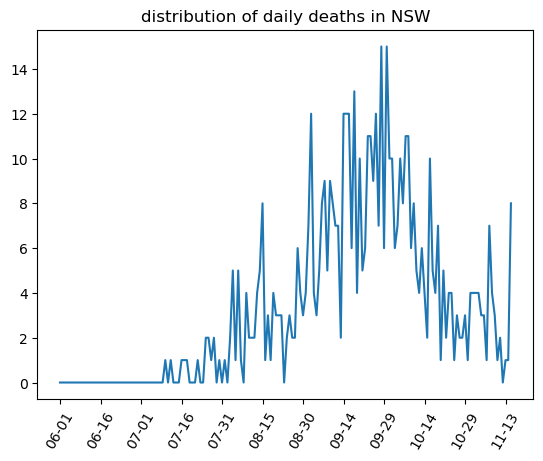

In [13]:
plt.plot(death['Date'], NSW_daily_death)
plt.title('distribution of daily deaths in NSW', fontsize=12)
plt.xticks(np.arange(0, 170, step=15), rotation=60)
plt.savefig('Plots/distribution of daily deaths in NSW.png',bbox_inches='tight')
plt.show()

### Output the daily death data

In [14]:
daily_death = pd.DataFrame({'Date' : death['Date'],
                                'NSW' : NSW_daily_death,
                                'VIC' : VIC_daily_death },columns=['Date','NSW', 'VIC'])
daily_death.to_csv("Output_Data/daily_death.csv")